## Loan Risk EDA Analytics 

<b>Goal: </b>How data can be used minimize the risk of losing money while lending to customers.

<b>Business Objective:</b>
The consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the compa.ny

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the comp

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher inter.est ratepany

In [657]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [658]:
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [659]:
data = pd.read_csv('loan.csv')

In [660]:

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [661]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [662]:
data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

### Basic stats about our data 

In [664]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [665]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [667]:
data.shape

(39717, 111)

### Handling missing value

In [669]:
null_data = data.isnull().sum()

In [670]:
null_data

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [671]:
null_data[null_data > 0]

emp_title                          2459
emp_length                         1075
desc                              12942
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


<h5>Getting the percentage of missing values by columns</h5> 

In [674]:
col_percentage=pd.DataFrame(data.isnull().mean().round(4)*100,columns =["Percentage_missing_value"]).sort_values(by=["Percentage_missing_value"])
print(col_percentage[col_percentage['Percentage_missing_value'] > 0])

                                Percentage_missing_value
last_credit_pull_d                                  0.01
title                                               0.03
tax_liens                                           0.10
revol_util                                          0.13
collections_12_mths_ex_med                          0.14
chargeoff_within_12_mths                            0.14
last_pymnt_d                                        0.18
pub_rec_bankruptcies                                1.75
emp_length                                          2.71
emp_title                                           6.19
desc                                               32.59
mths_since_last_delinq                             64.66
mths_since_last_record                             92.99
next_pymnt_d                                       97.13
num_bc_sats                                       100.00
mths_since_recent_bc                              100.00
mths_since_recent_bc_dlq       

### Removing columns 
<p> which have more than 50% of missing values as conservative approch best practices </p> 

In [676]:
threshold = 0.5

In [677]:
missing_pct = data.isnull().mean()

In [678]:
data_filtered = data.drop(columns=missing_pct[missing_pct > threshold].index)

In [679]:
data_filtered.shape

(39717, 54)

In [680]:
data_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

<b> Removing irrelevent columns as per Data Dictionary sheet</b>

In [682]:
columns_to_drop = [
    "id", "member_id", "url", "zip_code", "desc", "title", "last_credit_pull_d",
     "sub_grade", "emp_title","chargeoff_within_12_mths","tax_liens",
    "funded_amnt_inv", "out_prncp_inv", "policy_code","collections_12_mths_ex_med",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "last_pymnt_d",
    "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee"
]

In [683]:
data_filtered = data_filtered.drop(columns=columns_to_drop, axis=1)

In [684]:
data_filtered = data_filtered[data_filtered.loan_status!='Current']

In [685]:
data_filtered.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt_inv',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

<b>Checking null value post dropping columns</b>

In [687]:
data_filtered.isnull().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
revol_util                50
delinq_2yrs                0
delinq_amnt                0
acc_now_delinq             0
application_type           0
total_pymnt_inv            0
out_prncp                  0
initial_list_status        0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
inq_last_6mths             0
earliest_cr_line           0
loan_amnt                  0
funded_amnt                0
addr_state                 0
purpose                    0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
grade                      0
installment                0
int_rate                   0
term                       0
dti                        0
dtype: int64

In [688]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  pymnt_plan            38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

# Data Imputation

In [690]:
data_filtered['emp_length'].mode()[0]

'10+ years'

In [691]:
emp_length_mode = data_filtered['emp_length'].value_counts()

In [692]:
emp_length_mode 

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [693]:
data_filtered['emp_length'] = data_filtered['emp_length'].fillna(data_filtered['emp_length'].mode()[0])

In [694]:
data_filtered['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [695]:
data_filtered['pub_rec_bankruptcies'] = data_filtered['pub_rec_bankruptcies'].fillna(0)

In [696]:
 data_filtered['installment'] = data_filtered['installment'].fillna(data_filtered['installment'].median())

In [697]:
data_filtered = data_filtered.dropna(subset=['revol_util'])

In [698]:
data_filtered['revol_util'].isnull().sum()

0

In [699]:
data_filtered = data_filtered.reset_index(drop=True)

In [700]:
 data_filtered['installment'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 38527 entries, 0 to 38526
Series name: installment
Non-Null Count  Dtype  
--------------  -----  
38527 non-null  float64
dtypes: float64(1)
memory usage: 301.1 KB


In [701]:
data_filtered['home_ownership'] = data_filtered['home_ownership'].replace('NONE', 'OTHER')

## Derived Columns

In [703]:
mapping = {'Fully Paid': 0, 'Charged Off': 1}
data_filtered['loan_status_encoded'] = data_filtered['loan_status'].map(mapping)

In [704]:
data_filtered.issue_d=pd.to_datetime(data_filtered.issue_d,format='%b-%y')
data_filtered['issue_year']=pd.to_datetime(data_filtered.issue_d,format='%b-%y').dt.year
data_filtered['issue_month']=pd.to_datetime(data_filtered.issue_d,format='%b-%y').dt.month

# Standerdization of data

In [706]:
data_filtered['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    28.30%
Name: revol_util, dtype: object

In [707]:
def removePercentageSign(x):
    # lambda x: x[0:-1] if x[-1] == '%' else x
    if x[-1] == '%':
        return x[0:-1]
    else :
        return x

In [708]:
data_filtered.loc[:, 'revol_util'] = data_filtered['revol_util'].apply(removePercentageSign)

In [709]:
data_filtered['revol_util'].head()

0    83.70
1     9.40
2    98.50
3       21
4    28.30
Name: revol_util, dtype: object

In [710]:
data_filtered['revol_util'] = data_filtered['revol_util'].astype('float')

In [711]:
data_filtered['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
4    28.3
Name: revol_util, dtype: float64

In [712]:
data_filtered.loc[:, 'int_rate'] = data_filtered['int_rate'].apply(removePercentageSign)

In [713]:
data_filtered['int_rate'] = data_filtered['int_rate'].astype('float')

In [714]:
data_filtered['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4     7.90
Name: int_rate, dtype: float64

In [715]:
def convert_emp_length_int(x):
    if '<' in x:
        # If the string indicates "less than" a year, return 0
        return 0
    elif '+' in x:
        # If the string indicates "more than" a year, return the number before '+'
        return x.split('+')[0]
    else:
        # Otherwise, return the first number in the string
        return x.split()[0]

In [716]:
data_filtered.loc[:, 'emp_length'] = data_filtered['emp_length'].apply(convert_emp_length_int)

In [717]:
data_filtered['emp_length'] = data_filtered['emp_length'].astype('int')

In [718]:
data_filtered['emp_length'].head()

0    10
1     0
2    10
3    10
4     3
Name: emp_length, dtype: int32

In [720]:
data_filtered['term'] = data_filtered['term'].str.extract('(\d+)').astype('int')

In [721]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38527 entries, 0 to 38526
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38527 non-null  int64         
 1   funded_amnt           38527 non-null  int64         
 2   term                  38527 non-null  int32         
 3   int_rate              38527 non-null  float64       
 4   installment           38527 non-null  float64       
 5   grade                 38527 non-null  object        
 6   emp_length            38527 non-null  int32         
 7   home_ownership        38527 non-null  object        
 8   annual_inc            38527 non-null  float64       
 9   verification_status   38527 non-null  object        
 10  issue_d               38527 non-null  datetime64[ns]
 11  loan_status           38527 non-null  object        
 12  pymnt_plan            38527 non-null  object        
 13  purpose         

# Handling Outliers

In [723]:
data_filtered['annual_inc'].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: >

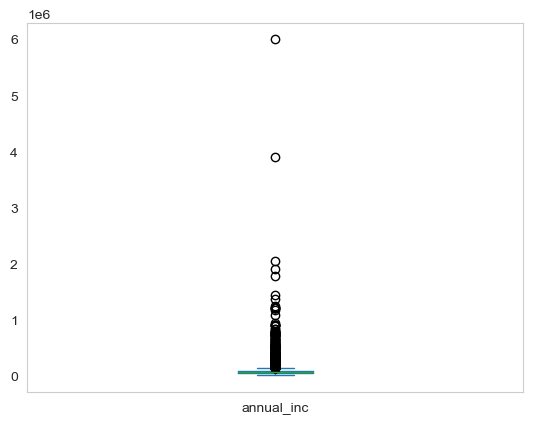

In [724]:
data_filtered['annual_inc'].plot.box()

In [725]:
data_filtered['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

<Axes: >

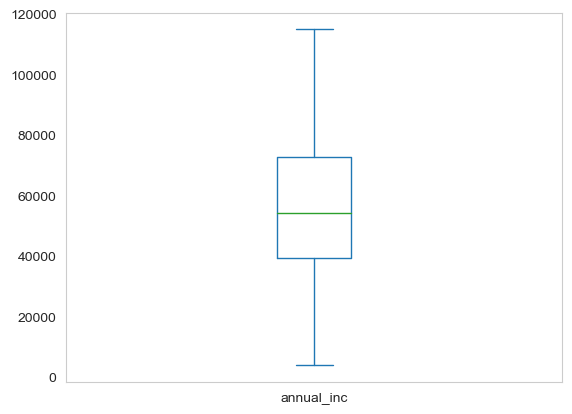

In [726]:
data_filtered[data_filtered['annual_inc'] < data_filtered['annual_inc'].quantile(0.90)]['annual_inc'].plot.box()

<Axes: >

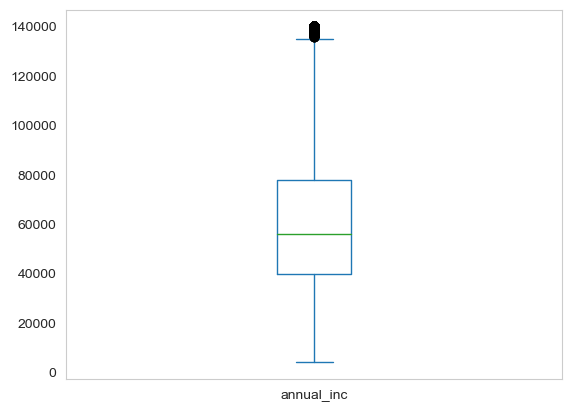

In [727]:
data_filtered[data_filtered['annual_inc'] <= data_filtered['annual_inc'].quantile(0.95)]['annual_inc'].plot.box()

<Axes: >

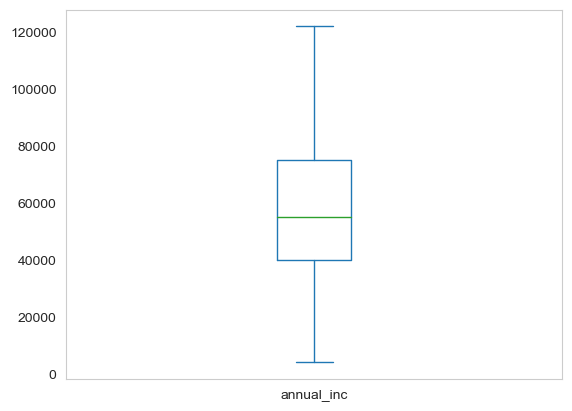

In [728]:
data_filtered[data_filtered['annual_inc'] <= data_filtered['annual_inc'].quantile(0.92)]['annual_inc'].plot.box()

In [729]:
data_filtered = data_filtered[data_filtered['annual_inc'] <= data_filtered['annual_inc'].quantile(0.92)]

<Axes: >

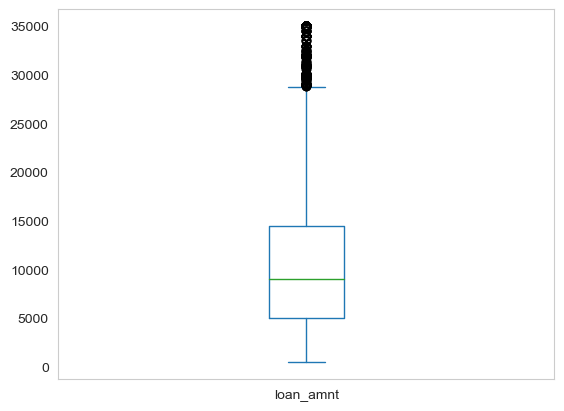

In [730]:
data_filtered['loan_amnt'].plot.box()

In [731]:
# data_filtered[data_filtered['loan_amnt'] <= data_filtered['loan_amnt'].quantile(0.95)]['loan_amnt'].plot.box()

In [732]:
# data_filtered['loan_amnt'] = data_filtered[data_filtered['loan_amnt'] <= data_filtered['loan_amnt'].quantile(0.95)]['loan_amnt']

In [733]:
Q1 = data_filtered['loan_amnt'].quantile(0.25)
Q3 = data_filtered['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
IQR

9500.0

<Axes: ylabel='Frequency'>

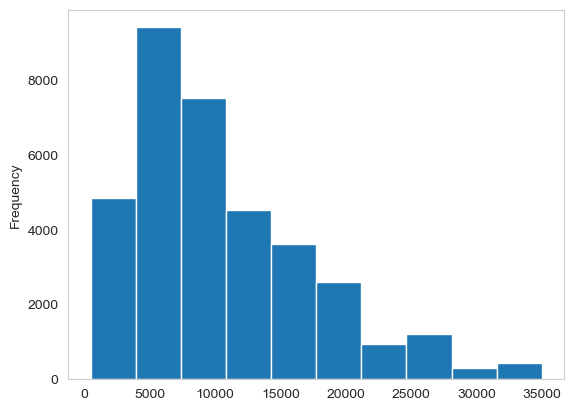

In [734]:
data_filtered['loan_amnt'].plot.hist()

<Axes: ylabel='Frequency'>

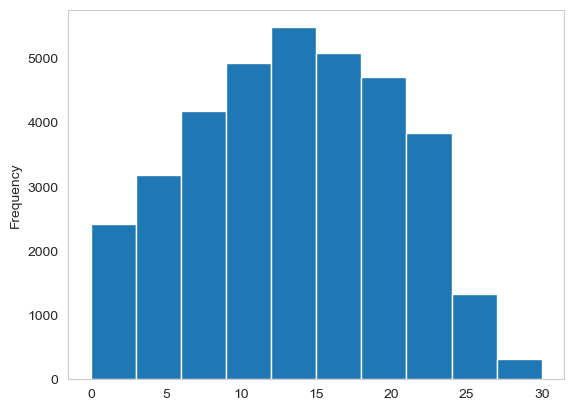

In [735]:
data_filtered['dti'].plot.hist()

<Axes: >

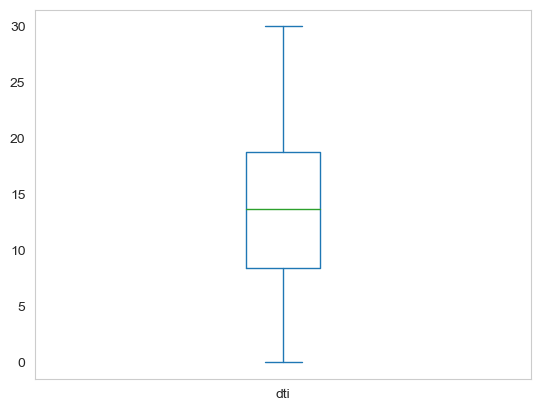

In [736]:
data_filtered['dti'].plot.box()

<Axes: xlabel='Interest rate distribution', ylabel='Frequency'>

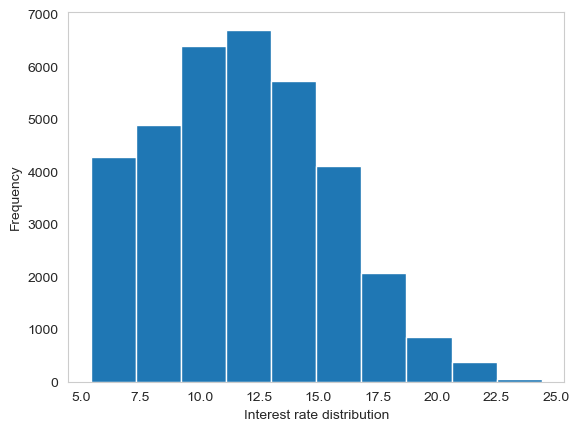

In [737]:
data_filtered['int_rate'].plot.hist(xlabel='Interest rate distribution')

<Axes: >

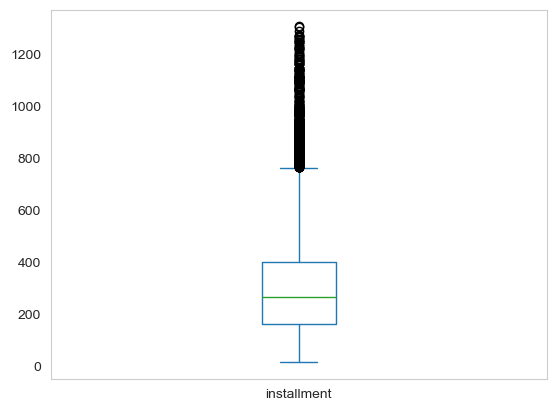

In [738]:
data_filtered['installment'].plot.box()

<Axes: >

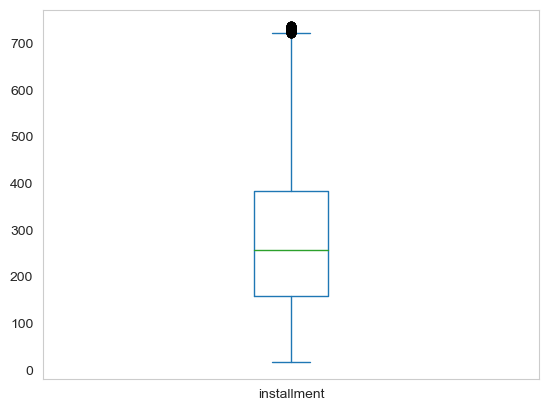

In [739]:
data_filtered[data_filtered['installment'] <= data_filtered['installment'].quantile(0.96)]['installment'].plot.box()

In [740]:
data_filtered = data_filtered[data_filtered['installment'] <= data_filtered['installment'].quantile(0.96)]

# Univariate Analysis

In [742]:
charged_off_data =  data_filtered[data_filtered.loan_status == 'Charged Off']

fully_paid_data =  data_filtered[data_filtered.loan_status == 'Fully Paid']

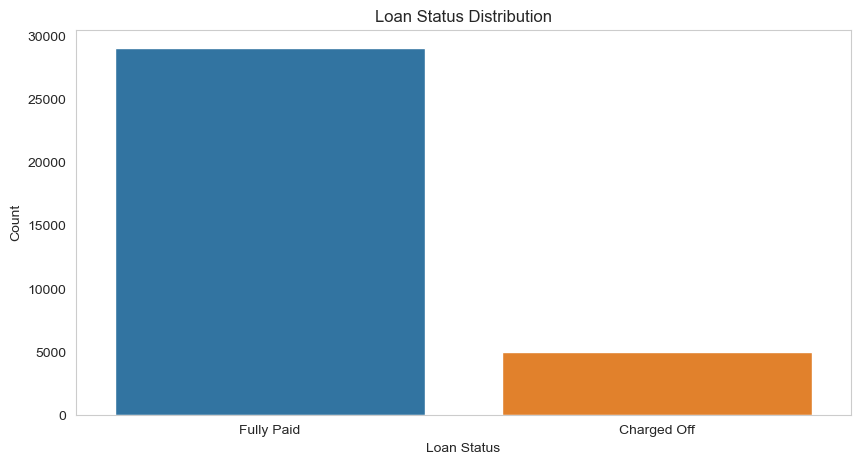

In [743]:
plt.figure(figsize=(10,5))
sns.countplot(x=data_filtered['loan_status'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

<b> Observation - </b> Less number of loans are defaulted

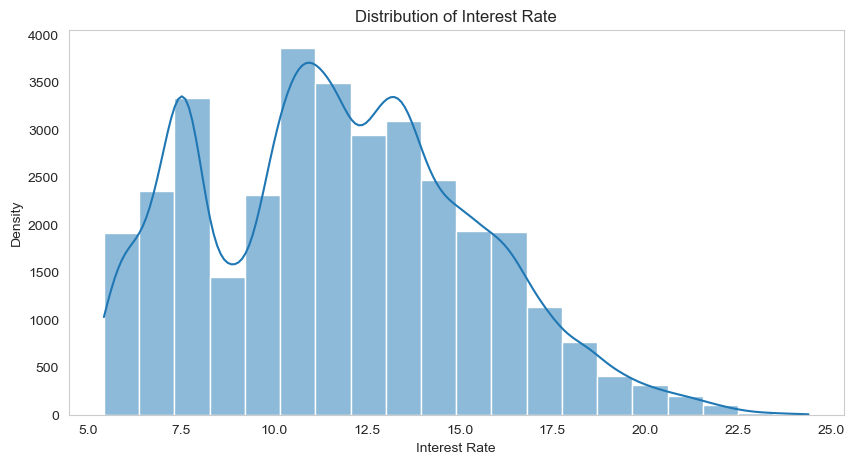

In [745]:
plt.figure(figsize=(10,5))
sns.histplot(sorted(data_filtered.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

<b> Obserbation- </b> We found between 5-8% interest and 10-15% being opted more.

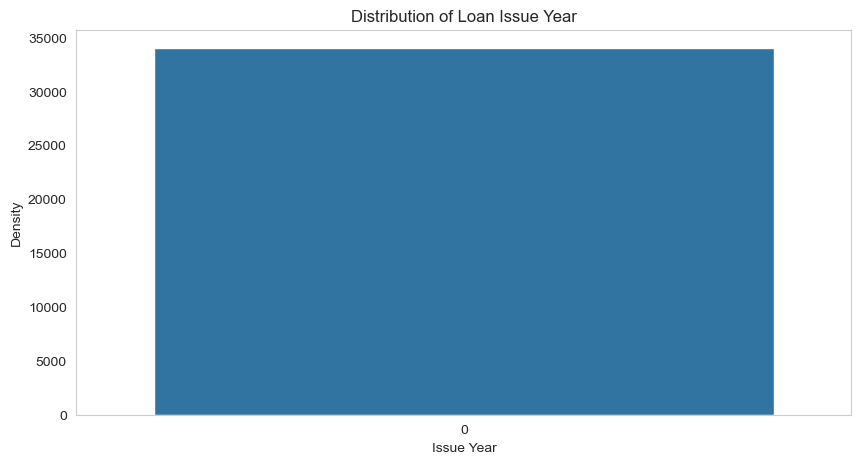

In [747]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(data_filtered.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

<b>Observation - </b> We have only one year data (2025).

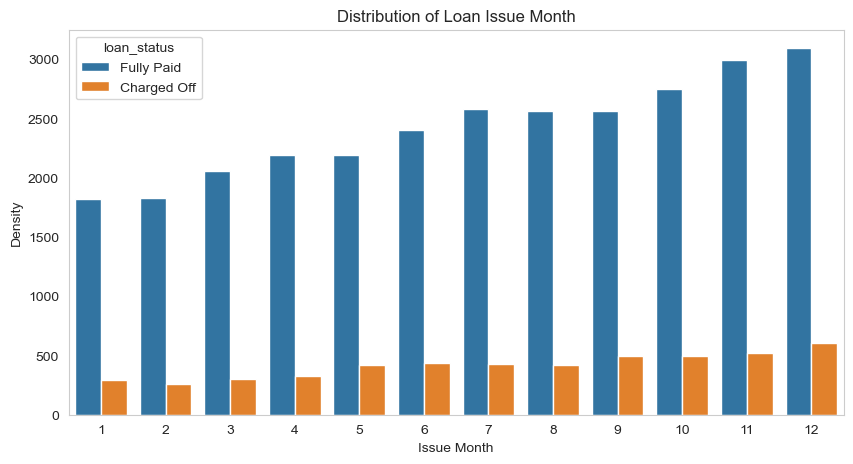

In [749]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(x=data_filtered.issue_month,hue=data_filtered.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

<b>Observation - </b> Most of the loans issued in the last quarter.

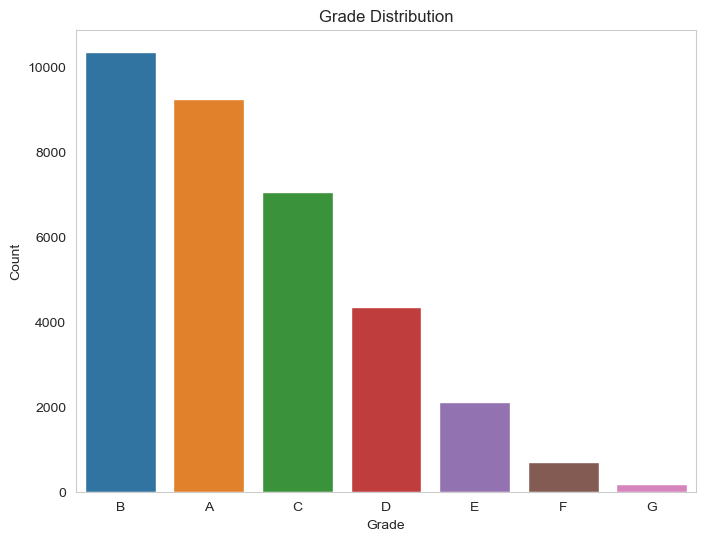

In [751]:
# data_filtered['grade'].value_counts().plot.bar()
plt.figure(figsize=(8, 6))
sns.countplot(x=data_filtered['grade'], order=data_filtered['grade'].value_counts().index)
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')

# Show the plot
plt.show()

<b>Observation -</b> We Found frequency of grade B is higher in comparision and followed by A second and C on third place 

In [753]:
# data_filtered['dti'].plot.hist(xlabel='Debt to Interest Ratio')
# create bins by percentage 


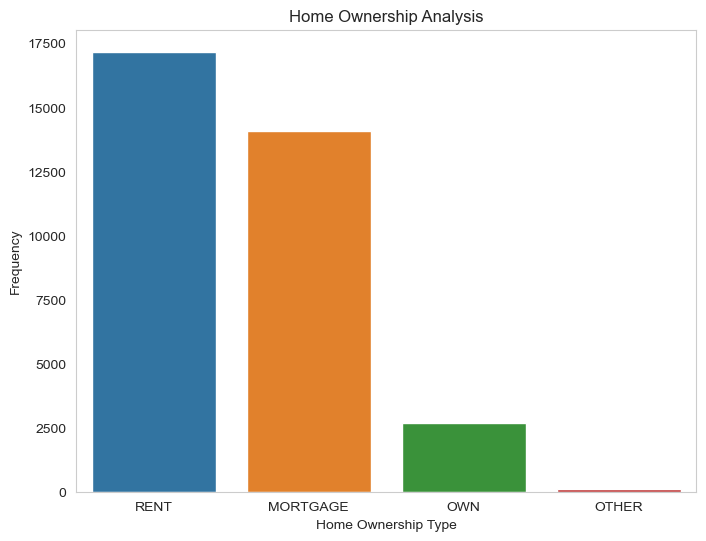

In [755]:
# data_filtered['home_ownership'].value_counts().plot.bar(title='Home ownership analysis', xlabel='Ownership type', ylabel='No. of homes') #Make it agaainsnt charged off
plt.figure(figsize=(8, 6))
sns.countplot(x=data_filtered['home_ownership'], order=data_filtered['home_ownership'].value_counts().index)
plt.title('Home Ownership Analysis')
plt.xlabel('Home Ownership Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<b> Observation -</b> The highest applicants have either rented or on Mortgage.

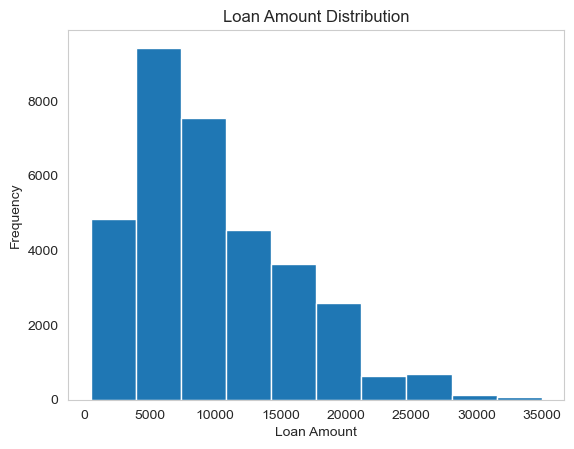

In [757]:
data_filtered['loan_amnt'].plot.hist(title='Loan Amount Distribution',xlabel="Loan Amount", ylabel='Frequency' )
plt.show()

<b> Observation -</b> We found Distribution of loan amount lies between 2k to 18k

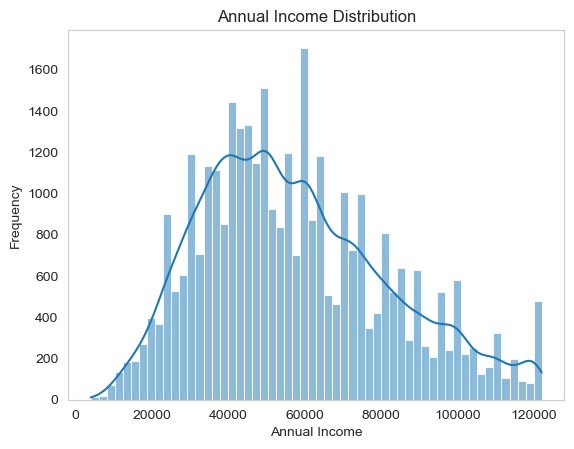

In [759]:
sns.histplot(data_filtered['annual_inc'], kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

<b> Observation - </b> We found most frequent Annual income fall between 25K to 70k

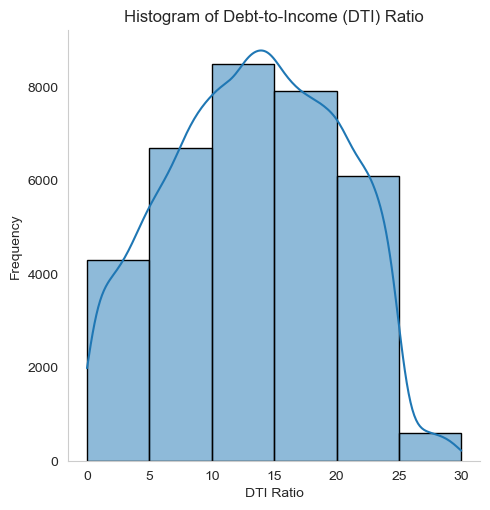

In [761]:

sns.displot(data_filtered['dti'], bins=6, edgecolor='black', kde=True)
plt.title('Histogram of Debt-to-Income (DTI) Ratio')
plt.xlabel('DTI Ratio')
plt.ylabel('Frequency')
plt.show()

<b>Observation -</b> We found D.T.I. 10%-15% is the highest

In [763]:
source_verified_perc =data_filtered['verification_status'].value_counts().iloc[2] / data_filtered['verification_status'].value_counts().sum()

In [764]:
verified_perc = data_filtered['verification_status'].value_counts().iloc[1] / data_filtered['verification_status'].value_counts().sum()

In [765]:
not_verified_perc = data_filtered['verification_status'].value_counts().iloc[0] / data_filtered['verification_status'].value_counts().sum()

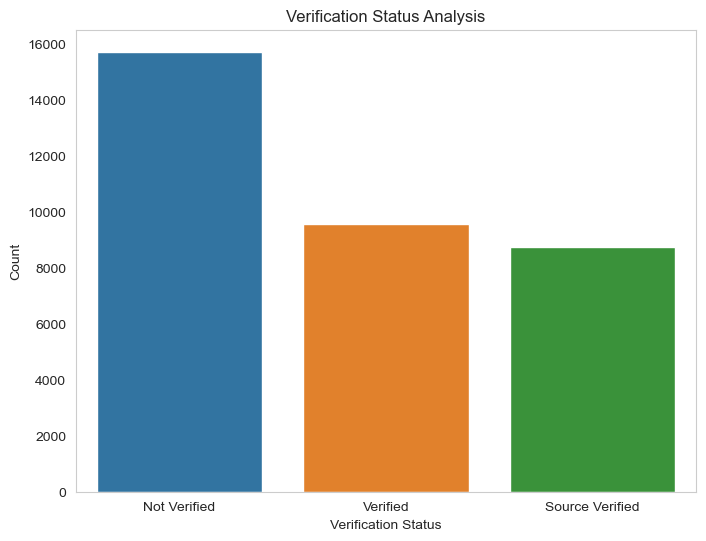

In [767]:
# data_filtered['verification_status'].value_counts().plot.bar(title='Home ownership analysis', xlabel='Ownership type', ylabel='No. of homes')
plt.figure(figsize=(8, 6))
sns.countplot(x=data_filtered['verification_status'], order=data_filtered['verification_status'].value_counts().index)
plt.title('Verification Status Analysis')
plt.xlabel('Verification Status')
plt.ylabel('Count')

# Show the plot
plt.show()

<b>Observation - </b> Around 55% are verified income sources if we combine Verified and Source Verified 

In [769]:
data_filtered['installment'].quantile(0.99)

691.4329999999998

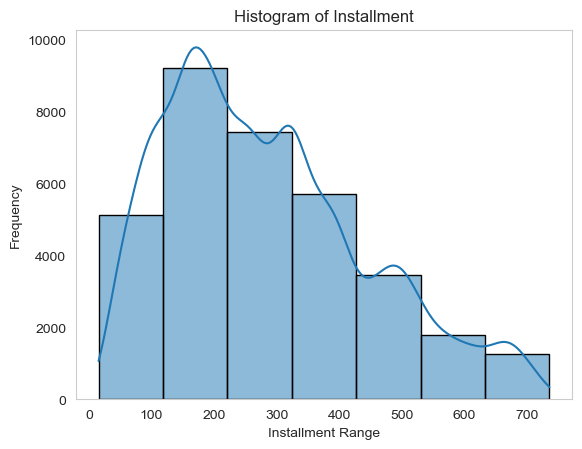

In [770]:
sns.histplot(data_filtered['installment'], bins=7, edgecolor='black', kde=True)
plt.title('Histogram of Installment')
plt.xlabel('Installment Range')
plt.ylabel('Frequency')
plt.show()

<b>Observation- </b> We Found the Installment Range 100-200 being the highest and trend keeps declining from here

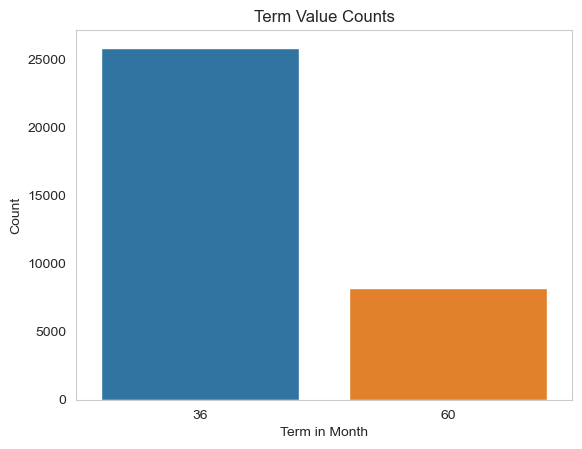

In [772]:
sns.countplot(x='term', data=data_filtered)
plt.title('Term Value Counts')
plt.xlabel('Term in Month')
plt.ylabel('Count')
plt.show()

<b>Observation -</b> Majority of the people opted for 36 month term

In [774]:
# sns.histplot(data_filtered['loan_amnt'], kde=True)
# plt.title('Loan Amount Distribution')
# plt.xlabel('Loan Amount')
# plt.ylabel('Frequency')
# plt.show()

# Bivariate Analysis

<h5> Segmented Bivariate analysis for Purpose of loan </h5>

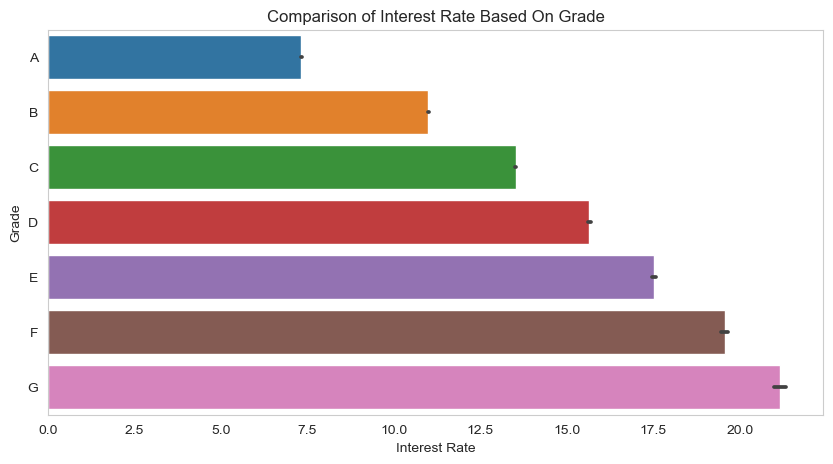

In [777]:
plt.figure(figsize=(10,5))
sns.barplot(data=data_filtered,x='int_rate',y='grade', order=sorted(data_filtered['grade'].unique()))
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

<b>Observation:</b> We found A approx 7.5 has the lowest interest rate and interest rate keep rising until our last Grade G i.e.approx 22%.

In [779]:

# data_filtered.groupby(['loan_status', 'grade'])['dti'].mean().plot.bar()
# plt.show()

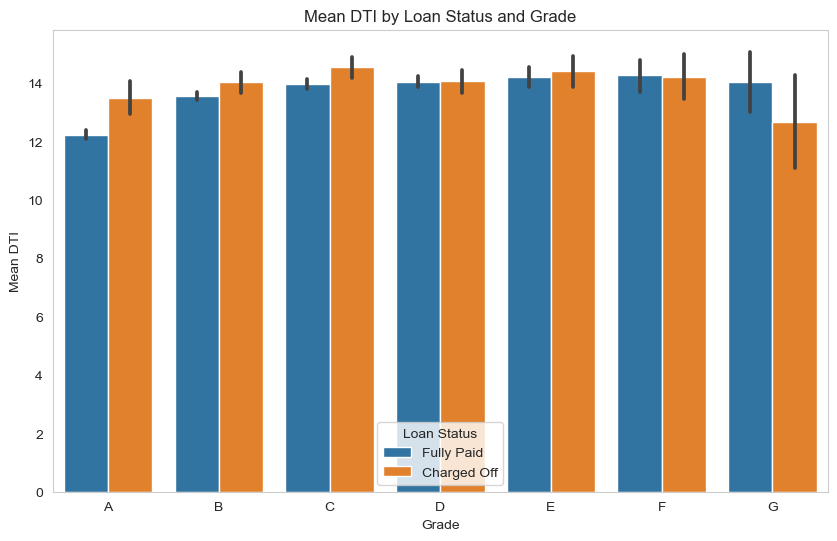

In [780]:
plt.figure(figsize=(10,6))
sns.barplot(x='grade', y='dti', hue='loan_status', data=data_filtered, order=sorted(data_filtered['grade'].unique()))
plt.title('Mean DTI by Loan Status and Grade')
plt.xlabel('Grade')
plt.ylabel('Mean DTI')
plt.legend(title='Loan Status')
plt.show()

<b>Observation:</b> We found that DTI ratio least for grade A among all Grades.

In [782]:
# plt.figure(figsize=(10,5))
# sns.lineplot(data=data_filtered,x='dti',y='grade',hue='loan_status')
# plt.xlabel('DTI')
# plt.ylabel('Grade')
# plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
# plt.show()

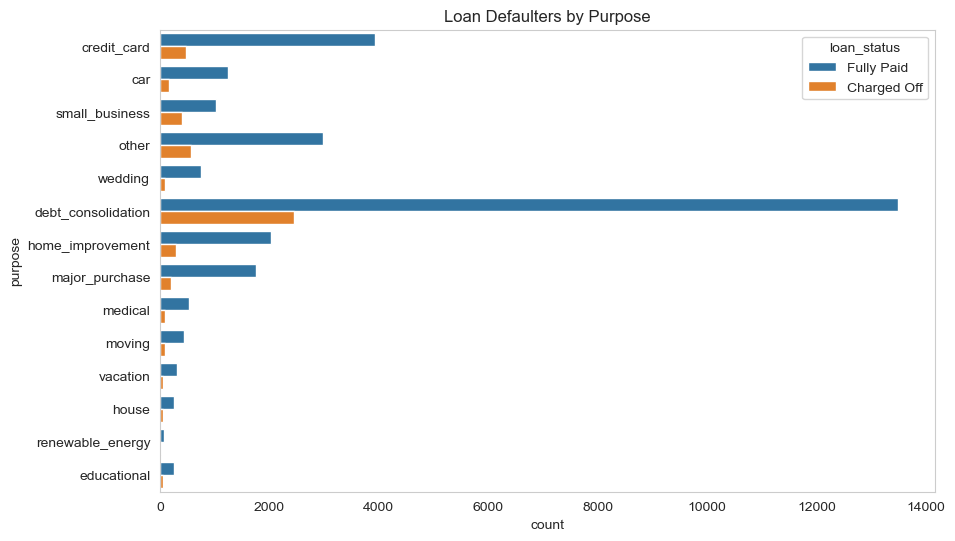

In [783]:
plt.figure(figsize=(10, 6))
sns.countplot(y ='purpose', data=data_filtered, hue='loan_status')
plt.title('Loan Defaulters by Purpose')
plt.show()

<b>Observation</b> - We found debt consolidation has the most of defaulters and fully paid borrower count.

# Grouping of data for Bivariate analysis (Segmented)

In [786]:
grouped_data = data_filtered.groupby('loan_status')[['loan_amnt', 'int_rate']].mean().reset_index()

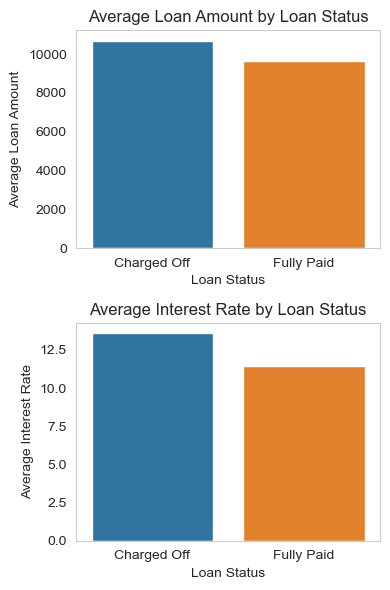

In [787]:
# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(4,6))

# Plot loan_amnt vs loan_status on the first subplot
sns.barplot(x='loan_status', y='loan_amnt', data=grouped_data, ax=axs[0])
axs[0].set_title('Average Loan Amount by Loan Status')
axs[0].set_xlabel('Loan Status')
axs[0].set_ylabel('Average Loan Amount')

# Plot int_rate vs loan_status on the second subplot
sns.barplot(x='loan_status', y='int_rate', data=grouped_data, ax=axs[1])
axs[1].set_title('Average Interest Rate by Loan Status')
axs[1].set_xlabel('Loan Status')
axs[1].set_ylabel('Average Interest Rate')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

<b>Observation -</b>We found the if Average loan amount as well as Average interest rate higher than chances of Charged off loan is higher.

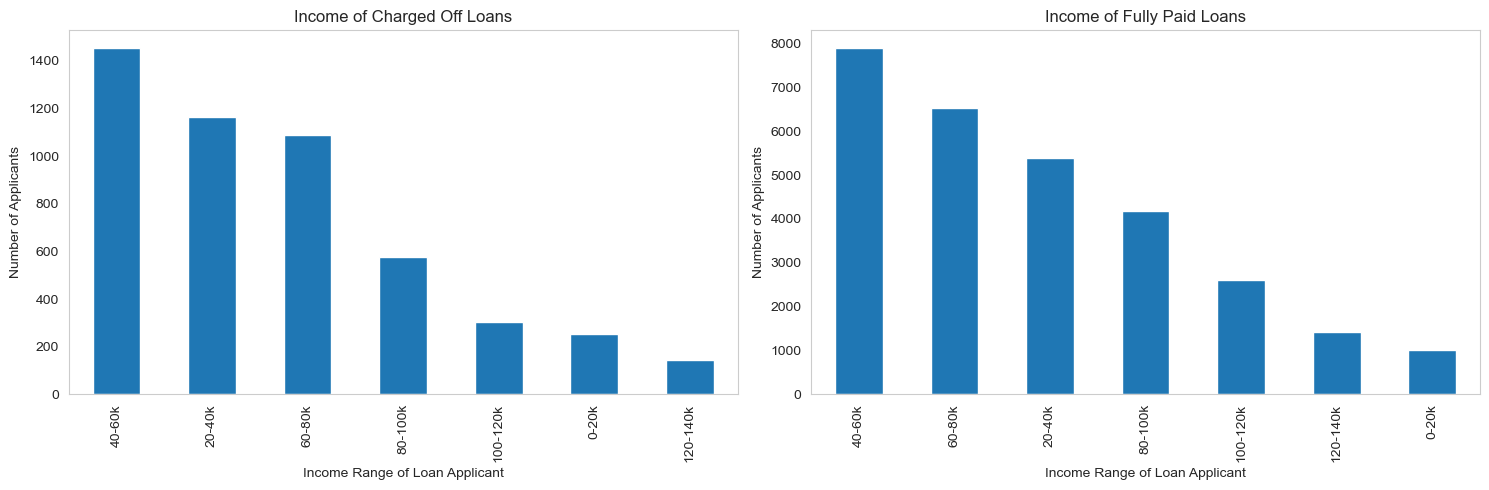

In [789]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Define custom labels
charged_off_labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k']

# Bin the values with custom labels
bins_charged_off = pd.cut(charged_off_data['annual_inc'], bins=7, labels=charged_off_labels)

# Plot the value counts
bins_charged_off.value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_xlabel('Income Range of Loan Applicant')
axs[0].set_ylabel('Number of Applicants')
axs[0].set_title('Income of Charged Off Loans')






# Define custom labels
fully_paid_labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k']

# Bin the values with custom labels
bins_fully_paid = pd.cut(fully_paid_data['annual_inc'], bins=7, labels=fully_paid_labels)

# Plot the value counts
bins_fully_paid.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Income Range of Loan Applicant')
axs[1].set_ylabel('Number of Applicants')
axs[1].set_title('Income of Fully Paid Loans')



plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

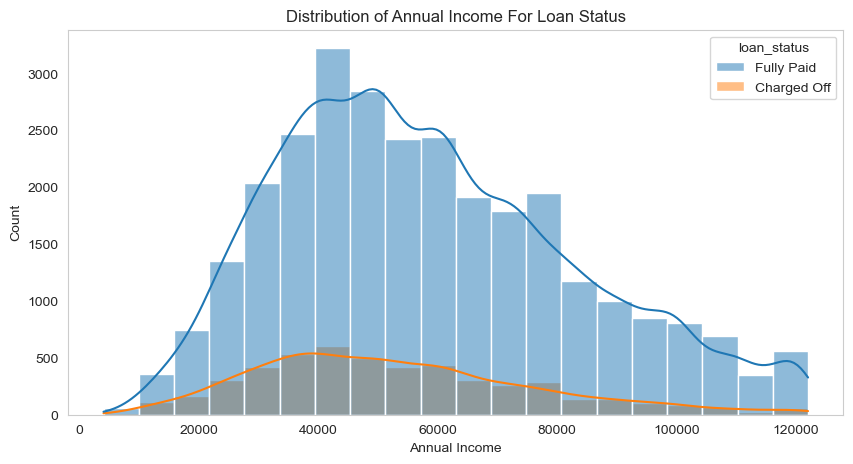

In [790]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=data_filtered,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

<b>Observation -</b> The frequency for charged off loan is higher for income around 40000.

In [792]:
data_filtered.groupby('term')['int_rate'].mean()

term
36    10.883217
60    14.522211
Name: int_rate, dtype: float64

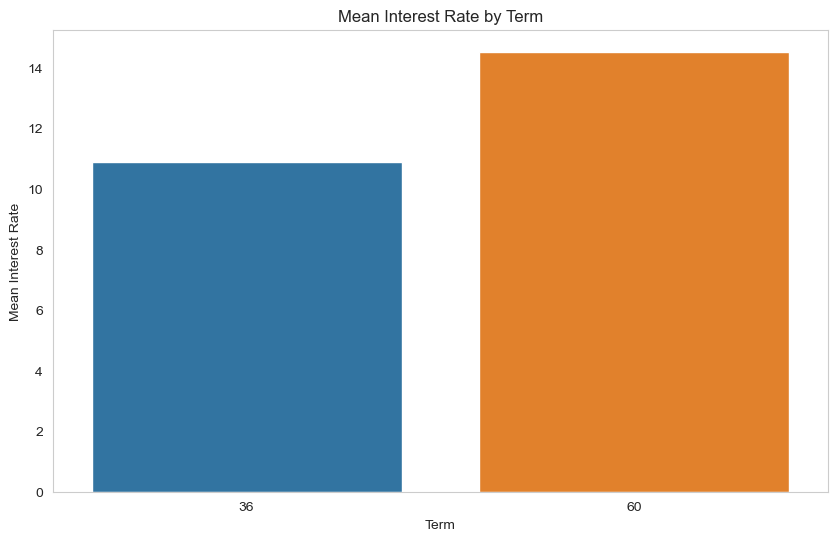

In [793]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_filtered.groupby('term')['int_rate'].mean().index, 
             y=data_filtered.groupby('term')['int_rate'].mean().values)
plt.title('Mean Interest Rate by Term')
plt.xlabel('Term')
plt.ylabel('Mean Interest Rate')
plt.show()

<b> Observation -</b> We have observed that the average interest rate for 36 month term is 10.967615% and for 60 month it is 14.667568% .So we can conclude the higher the term the interest rate rises.

In [795]:
ratio_by_state = data_filtered.groupby(['addr_state', 'loan_status'])['loan_status'].count() / \
data_filtered.groupby('addr_state')['loan_status'].count()
ratio_by_state

addr_state  loan_status
AK          Charged Off    0.191176
            Fully Paid     0.808824
AL          Charged Off    0.118090
            Fully Paid     0.881910
AR          Charged Off    0.116822
            Fully Paid     0.883178
AZ          Charged Off    0.144371
            Fully Paid     0.855629
CA          Charged Off    0.163654
            Fully Paid     0.836346
CO          Charged Off    0.128093
            Fully Paid     0.871907
CT          Charged Off    0.139871
            Fully Paid     0.860129
DC          Charged Off    0.063218
            Fully Paid     0.936782
DE          Charged Off    0.098039
            Fully Paid     0.901961
FL          Charged Off    0.180589
            Fully Paid     0.819411
GA          Charged Off    0.160535
            Fully Paid     0.839465
HI          Charged Off    0.183673
            Fully Paid     0.816327
IA          Fully Paid     1.000000
ID          Charged Off    0.200000
            Fully Paid     0.800000
IL  

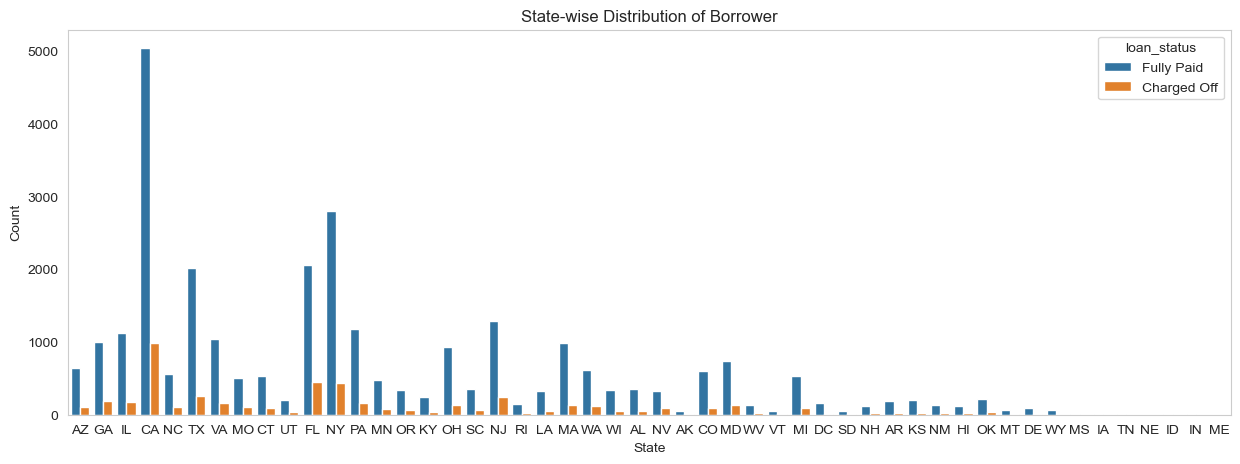

In [796]:
plt.figure(figsize=(15,5))
sns.countplot(x=data_filtered.addr_state,hue=data_filtered.loan_status)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State-wise Distribution of Borrower',fontsize=12)
plt.show()

<b>Observation </b> We found that no. of borrowers are higher for Califonia State for fully paid as well as defaulters but the ratio for fully paid higher in Wyoming state around 95% and around 5% defaulted.

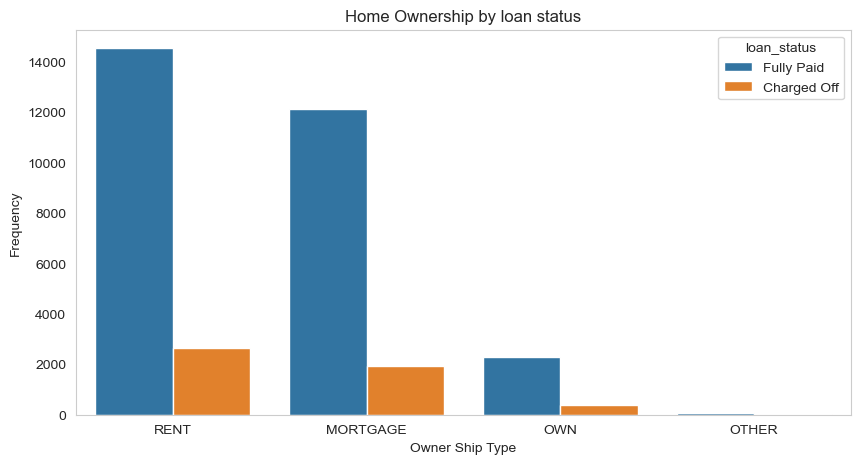

In [798]:
plt.figure(figsize=(10,5))
sns.countplot(x=data_filtered.home_ownership,hue=data_filtered.loan_status, order=data_filtered.home_ownership.value_counts().index)
plt.xlabel('Owner Ship Type')
plt.ylabel('Frequency')
plt.title('Home Ownership by loan status',fontsize=12)
plt.show()

<b>Observation -</b> The highest borrower have either rented or on Mortgage and along with the loan status.

In [800]:
# plt.figure(figsize=(30,30))
# sns.displot(x=data_filtered.annual_inc,hue=data_filtered.loan_status, kde=True)
# plt.xlabel('Annual Income')
# plt.ylabel('Loan Status')
# plt.title('Distribution of Income by Loan Status',fontsize=12)
# plt.show()

<Figure size 3000x3000 with 0 Axes>

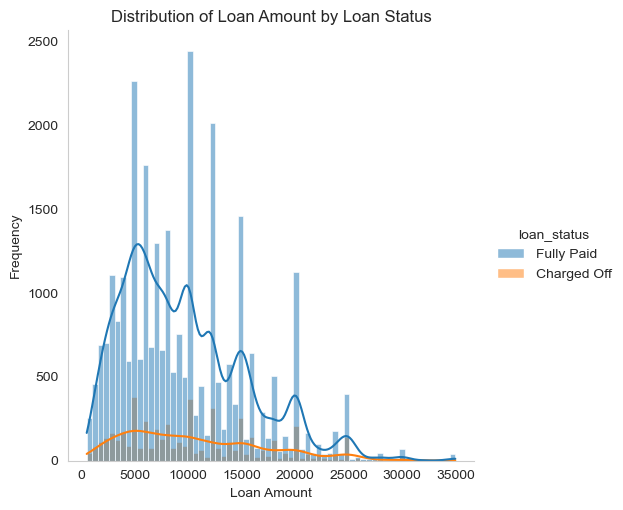

In [801]:
plt.figure(figsize=(30,30))
sns.displot(x=data_filtered.loan_amnt,hue=data_filtered.loan_status, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount by Loan Status',fontsize=12)
plt.show()

<b> Observation-</b> The borrowers falling with loan amount between 3000 to 12000 are less likely to be defaulters and when the loan amount going beyond 17000 the trend for defaulters risk keep incresing.

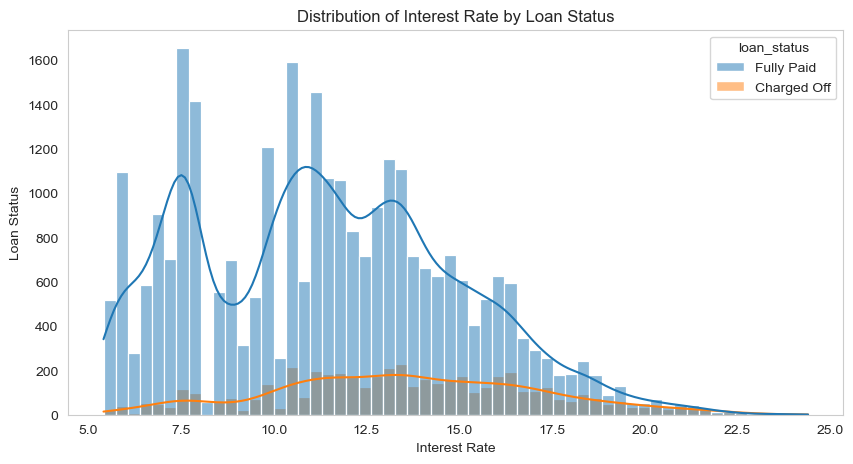

In [803]:
plt.figure(figsize=(10,5))
sns.histplot(x=data_filtered.int_rate,hue=data_filtered.loan_status, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Distribution of Interest Rate by Loan Status',fontsize=12)
plt.show()

<b> Observation -</b> When the interest rate going beyond 15% the trend for defaulters risk keep incresing and the borrowers with interest rate of 7.5% and 11% found to be least risky.

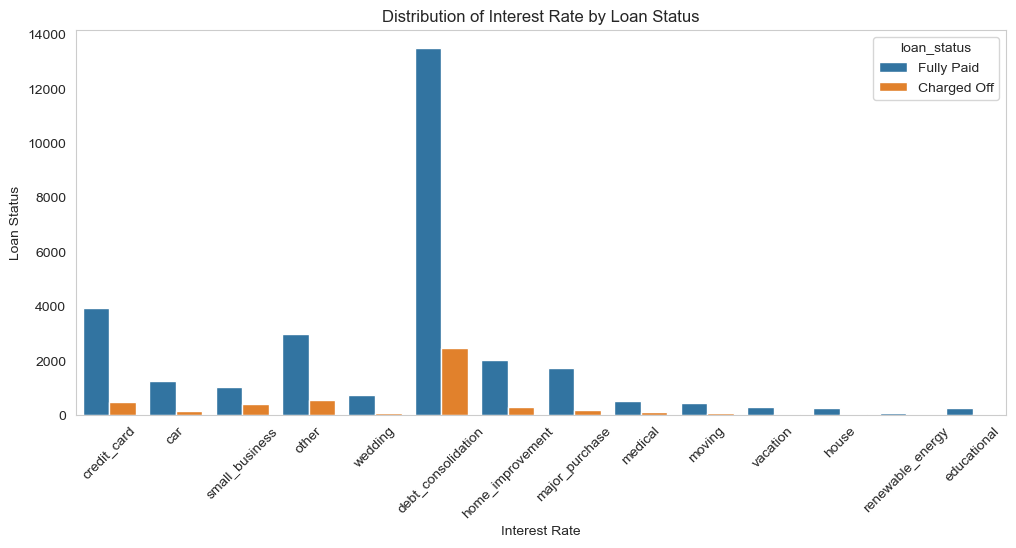

In [805]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)  
sns.countplot(x=data_filtered.purpose,hue=data_filtered.loan_status, orient='h')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Distribution of Interest Rate by Loan Status')
plt.show()

<b> Observation -</b> Borrowers are most likely to consolidate their loans when they more than single loan and seems like housing, educational and vacational loans are least risky.

<Figure size 500x500 with 0 Axes>

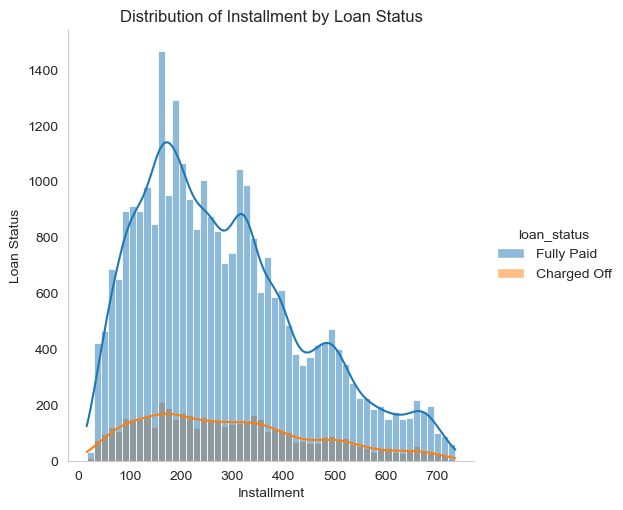

In [807]:
plt.figure(figsize=(5,5))
# plt.xticks(rotation=45)  
sns.displot(x=data_filtered.installment,hue=data_filtered.loan_status, kde=True)
plt.xlabel('Installment')
plt.ylabel('Loan Status')
plt.title('Distribution of Installment by Loan Status')
plt.show()

<b>Observation - </b>When the installment amount going beyond 400 the trend for defaulters risk keep incresing and borrower are most likely to opt for installment amount around 180.

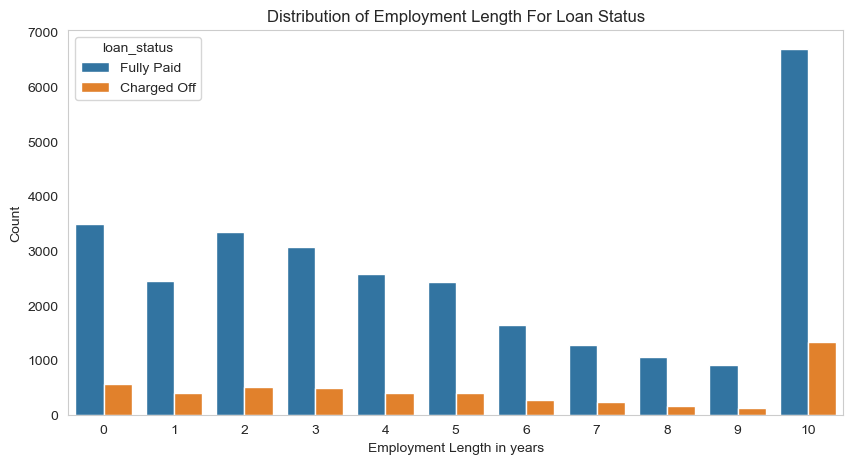

In [809]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=data_filtered,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

<b>Observation - </b> People with 10+ years of experience are highy probabily to borrow loan comparatively and because they are most frequent borrowers we need to employ more risk mitigation when the employ have 10+ years of experience.

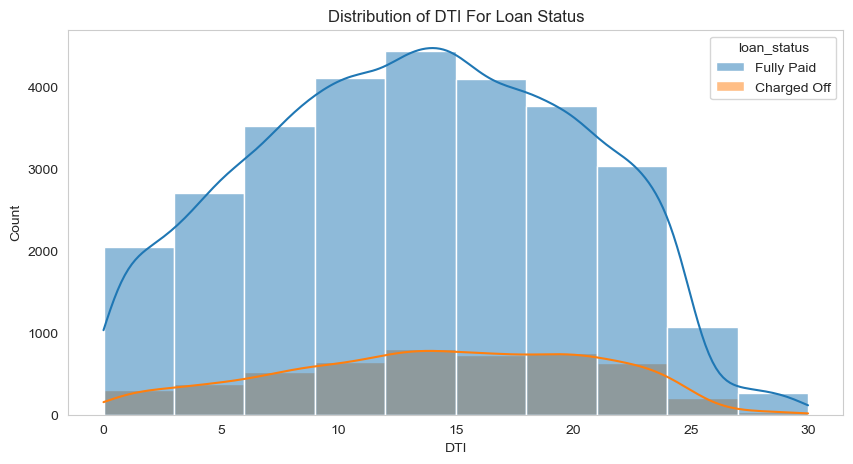

In [811]:
plt.figure(figsize=(10,5))
sns.histplot(data=data_filtered,x='dti',hue='loan_status',bins=10, kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

<b> Observation -</b> when the DTI going beyond around 22% the trend for defaulters risk keep incresing and the borrowers with DTI is around 15% found to be least risky but number of defaulter is higher in the range.

# Multi Variate analysis

In [814]:
# # Create the barplot
# plt.figure(figsize=(10, 6))
# sns.barplot(data=data_filtered, x='home_ownership', y='annual_inc', hue='loan_status')

# # Add title and labels
# plt.title('Annual Income by Home Ownership and Loan Status')
# plt.xlabel('Home Ownership')
# plt.ylabel('Annual Income')

# # Add legend title
# plt.legend(title='Loan Status')

# # Show the plot
# plt.show()

In [815]:
data_filtered.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt_inv',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies', 'loan_status_encoded', 'issue_year',
       'issue_month'],
      dtype='object')

In [816]:
data_filtered.loan_status.value_counts()

loan_status
Fully Paid     29042
Charged Off     4989
Name: count, dtype: int64

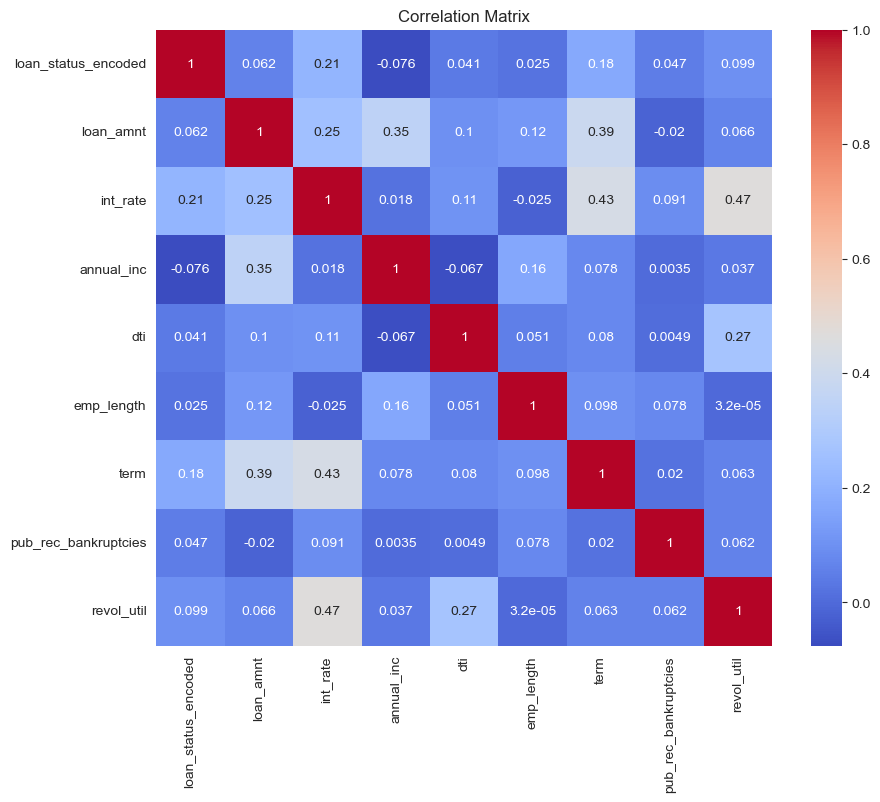

In [817]:
# Calculate the correlation matrix
corr_matrix = data_filtered[['loan_status_encoded','loan_amnt', 'int_rate', 'annual_inc', 'dti', 'emp_length','term','pub_rec_bankruptcies','revol_util']].corr()
#data_excluded=data_filtered.select_dtypes(exclude=['object'])
#corr_matrix = data_excluded.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Overall Observations:

<b>Default Trends:</b>
A smaller number of loans are defaulted, but these require closer attention to reduce financial risk.

<b>Purpose of Loans:</b>
Debt consolidation accounts for the highest count of both defaults and fully paid loans, highlighting its importance in borrower analysis.

<b>Borrower Attributes:</b>
- **Income Sources:** Around 55% of income sources are verified, emphasizing the reliability of income verification in risk assessment.
- **Employment Tenure:** Borrowers with 10+ years of experience are frequent loan applicants, necessitating stricter risk mitigation for this segment.
- **Housing Status:** The majority of borrowers are either renting or paying a mortgage, indicating potential financial pressure.

<b>Loan Characteristics:</b>
- **Loan Amount:** Borrowers with loans between \\$3,000 and \\$12,000 are less likely to default, while defaults increase for loans exceeding \\$17,000 .
- **Interest Rate:** Interest rates above 15% correlate with higher default risks, while lower rates (7.5%–11%) are associated with safer borrowers.
- **Loan Term:** A 36-month term is preferred by most borrowers, but longer terms correlate with higher interest rates and increased risk.

<b>Debt-to-Income Ratio (DTI):</b>
- Borrowers with a DTI of 10%–15% are the least risky, but a DTI exceeding 22% significantly increases default probabilities.

<b>Geographical Trends:</b>
- Borrowers in California dominate the dataset, with a high count of both defaults and fully paid loans. However, Wyoming exhibits a high repayment ratio (~95% fully paid).

<b>Installment Amount:</b>
- Installments above 400 increase default risk, while borrowers commonly opt for amounts around 180.

<b>Credit Grades:</b>
- Grades B, A, and C are the most frequent, with Grade A having the lowest interest rates (~7.5%) and lowest DTI, making it the least risky.

<b>Quarterly Issuance:</b>
- Most loans are issued in the last quarter, indicating potential seasonal trends in borrowing behavior.